In [8]:
import os
import sys
sys.path.insert(0, os.path.abspath('./C'))
sys.path.insert(0, os.path.abspath('./PyTests'))
import numpy as np
import matplotlib.pyplot as plt
import C.PyCWrapper as PCWrap
import utilitiesForTests as tUtil
import Util.plot as uPlt

In [4]:
x0,y0,dx0,dy0=tUtil.buildPads( 16, 8, -2.0, 2.0, -2.0, 2.0 )

In [13]:
x0[:2], dx0[:2], y0[:2], dy0[:2]

(array([-1.875, -1.625]),
 array([0.125, 0.125]),
 array([-1.75, -1.75]),
 array([0.25, 0.25]))

In [57]:
z0=np.ones(len(x0))
odd=np.arange(0,len(z0),1)%2==0
z0[odd]=0

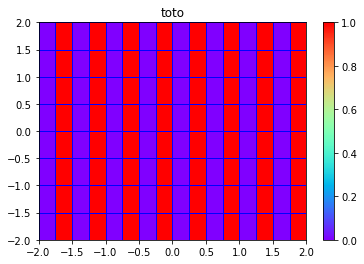

In [56]:
fig,ax = plt.subplots()
uPlt.setLUTScale(0.0,1.0)
uPlt.drawPads(fig,ax,x0,y0,dx0,dy0,z0,title="toto")

In [59]:
x0, y0, dx0, dy0 = tUtil.buildPads( 4, 2, -1.0, 1.0, -1.0, 1.0 )
x1, y1, dx1, dy1 = tUtil.buildPads( 2, 4, -1.0, 1.0, -1.0, 1.0 )


In [65]:
def mathieson_t():
    K = 1
    mu = [0.0, 0.0]
    chId = 2
    
    x0, y0, dx0, dy0 = tUtil.buildPads( 4, 2, -1.0, 1.0, -1.0, 1.0 )
    x1, y1, dx1, dy1 = tUtil.buildPads( 2, 4, -1.0, 1.0, -1.0, 1.0 )
    
    # Merge pads
    N0 = x0.size
    (x, y, dx, dy) = tUtil.mergePads( x0, y0, dx0, dy0, x1, y1, dx1, dy1 )
    cath = np.zeros( x.size, dtype=np.int32 )
    cath[N0:] = 1
    #
    # xyInfSup
    xInf = x - dx - mu[0]
    xSup = x + dx - mu[0]
    yInf = y - dy - mu[1]
    ySup = y + dy - mu[1]
    """
    print("x", x)
    print("y", y)
    print("xInf", xInf)
    print("xSup", xSup)
    print("yInf", yInf)
    print("ySup", ySup)
    print("cath", cath)
    """
    z = tUtil.compute2DPadIntegrals( xInf, xSup, yInf, ySup, chId )
    # print("z", z)
    print("sum z", np.sum(z))

    # Mathieson shift
    mu = [0.4, 0.5]
    chId = 0
    # xyInfSup
    xInf = x - dx - mu[0]
    xSup = x + dx - mu[0]
    yInf = y - dy - mu[1]
    ySup = y + dy - mu[1]
    
    q = tUtil.compute2DPadIntegrals( xInf, xSup, yInf, ySup, chId )
    # print("z", z)
    print("sum q", np.sum(q))
    

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
    uPlt.setLUTScale( 0, np.max(z) )
    uPlt.drawPads( fig, ax[0,0], x[cath==0], y[cath==0], dx[cath==0], dy[cath==0], z[cath==0],  title="Mathieson (%d,%d) cath-0" % (0,0))
    uPlt.drawPads( fig, ax[0,1], x[cath==1], y[cath==1], dx[cath==1], dy[cath==1], z[cath==1],  title="Mathieson (%d,%d) cath-1" % (0,0))
    uPlt.setLUTScale( 0, np.max(q) )
    uPlt.drawPads( fig, ax[1,0], x[cath==0], y[cath==0], dx[cath==0], dy[cath==0], q[cath==0],  title="Mathieson (%3.1f, %3.1f) cath-0" % (mu[0],mu[1]) )
    uPlt.drawPads( fig, ax[1,1], x[cath==1], y[cath==1], dx[cath==1], dy[cath==1], q[cath==1],  title="Mathieson (%3.1f, %3.1f) cath-1" % (mu[0],mu[1]) )
    #

In [66]:
mathieson_t()

NameError: name 'CLib' is not defined